# QC-Amp Table 1 Diagrams

 

This notebook constructs an abstract, programmatic version of the diagrams listed in an abstracted **Table 1**, using only minimal, non-copyrightable parameters.

Each diagram is specified by a small set of numeric and combinatorial descriptors, which are then used to reconstruct, visualize, and export generic diagram representations.

## 1. Load and Inspect Table 1 Data



In this section we define a simple in-notebook data structure representing an abstracted version of Table 1.
Each row corresponds to one diagram with:
- a unique identifier `diagram_id`,
- a short label `label`,
- counts of external and internal lines, and
- a generic graph structure described by nodes and edges.

These parameters are purely structural and do not reproduce any expressive layout or styling from the original source.

In [1]:
import pandas as pd

from dataclasses import dataclass

from typing import List, Tuple, Dict, Any



# Minimal abstract representation of 'Table 1' diagrams.

# Captures only:

#   - a unique id,

#   - a short label,

#   - simple counts, and

#   - a generic node/edge structure.



table1_data = [

    {

        'diagram_id': 'D1',

        'label': 'quark_emission_absorption',

        'n_external_quark_lines': 2,

        'n_gluon_lines': 1,

        # nodes: generic interaction or endpoint identifiers

        'nodes': ['q_in', 'vertex1', 'q_out', 'g_ext'],

        # edges: (source, target, type)

        'edges': [

            ('q_in', 'vertex1', 'quark'),

            ('vertex1', 'q_out', 'quark'),

            ('vertex1', 'g_ext', 'gluon'),

        ]

    },

    {

        'diagram_id': 'D2',

        'label': 'double_gluon_exchange',

        'n_external_quark_lines': 2,

        'n_gluon_lines': 2,

        'nodes': ['q_in', 'v1', 'v2', 'q_out', 'g1_ext', 'g2_ext'],

        'edges': [

            ('q_in', 'v1', 'quark'),

            ('v1', 'v2', 'quark'),

            ('v2', 'q_out', 'quark'),

            ('v1', 'g1_ext', 'gluon'),

            ('v2', 'g2_ext', 'gluon'),

        ]

    },

    {

        'diagram_id': 'D3',

        'label': 'gluon_loop_on_quark',

        'n_external_quark_lines': 2,

        'n_gluon_lines': 2,

        'nodes': ['q_in', 'v1', 'v2', 'q_out'],

        'edges': [

            ('q_in', 'v1', 'quark'),

            ('v1', 'v2', 'quark'),

            ('v2', 'q_out', 'quark'),

            ('v1', 'v2', 'gluon'),

            ('v2', 'v1', 'gluon'),

        ]

    }

]



df_table1 = pd.DataFrame(table1_data)

df_table1

,diagram_id,label,n_external_quark_lines,n_gluon_lines,nodes,edges
0,D1,quark_emission_absorption,2,1,"[q_in, vertex1, q_out, g_ext]","[(q_in, vertex1, quark), (vertex1, q_out, quar..."
1,D2,double_gluon_exchange,2,2,"[q_in, v1, v2, q_out, g1_ext, g2_ext]","[(q_in, v1, quark), (v1, v2, quark), (v2, q_ou..."
2,D3,gluon_loop_on_quark,2,2,"[q_in, v1, v2, q_out]","[(q_in, v1, quark), (v1, v2, quark), (v2, q_ou..."


In [2]:
# Inspect column types and ensure required fields are present

print(df_table1.dtypes)



required_columns = {'diagram_id', 'label', 'n_external_quark_lines', 'n_gluon_lines', 'nodes', 'edges'}

missing = required_columns - set(df_table1.columns)

assert not missing, f"Missing required columns: {missing}"

df_table1.head()

diagram_id                object
label                     object
n_external_quark_lines     int64
n_gluon_lines              int64
nodes                     object
edges                     object
dtype: object


,diagram_id,label,n_external_quark_lines,n_gluon_lines,nodes,edges
0,D1,quark_emission_absorption,2,1,"[q_in, vertex1, q_out, g_ext]","[(q_in, vertex1, quark), (vertex1, q_out, quar..."
1,D2,double_gluon_exchange,2,2,"[q_in, v1, v2, q_out, g1_ext, g2_ext]","[(q_in, v1, quark), (v1, v2, quark), (v2, q_ou..."
2,D3,gluon_loop_on_quark,2,2,"[q_in, v1, v2, q_out]","[(q_in, v1, quark), (v1, v2, quark), (v2, q_ou..."


## 2. Programmatic Reconstruction of Diagrams from Table 1



We now convert each abstract table row into a simple graph-like diagram description.
Each diagram is represented by:
- a set of nodes with 2D coordinates (assigned generically by layout rules), and
- a set of edges between nodes, annotated by type (e.g. quark or gluon).

The layout algorithm below is intentionally simple and generic: nodes are placed on a horizontal line with equal spacing, and edges are drawn as straight segments. No attempt is made to mimic any specific original artwork or layout.

In [3]:
import math

from collections import defaultdict



@dataclass

class DiagramNode:

    name: str

    x: float

    y: float

    kind: str  # 'quark', 'gluon', or 'vertex'



@dataclass

class DiagramEdge:

    source: str

    target: str

    kind: str  # 'quark' or 'gluon'



@dataclass

class Diagram:

    diagram_id: str

    label: str

    nodes: Dict[str, DiagramNode]

    edges: List[DiagramEdge]



def infer_node_kind(name: str) -> str:

    if name.startswith('q_') or name.startswith('q'):

        return 'quark'

    if 'g' in name:

        return 'gluon'

    return 'vertex'



def layout_nodes(nodes: List[str]) -> Dict[str, DiagramNode]:

    # Simple layout: place nodes on a horizontal line with equal spacing.

    n = len(nodes)

    if n == 1:

        return {nodes[0]: DiagramNode(nodes[0], 0.0, 0.0, infer_node_kind(nodes[0]))}

    spacing = 1.0

    x0 = -0.5 * spacing * (n - 1)

    layout: Dict[str, DiagramNode] = {}

    for i, name in enumerate(nodes):

        x = x0 + i * spacing

        y = 0.0

        layout[name] = DiagramNode(name=name, x=x, y=y, kind=infer_node_kind(name))

    return layout



def build_diagram_from_row(row: pd.Series) -> Diagram:

    node_names = list(row['nodes'])

    edges_raw = list(row['edges'])

    node_layout = layout_nodes(node_names)

    edges = [DiagramEdge(source=s, target=t, kind=k) for (s, t, k) in edges_raw]

    return Diagram(diagram_id=row['diagram_id'], label=row['label'], nodes=node_layout, edges=edges)



def build_all_diagrams(df: pd.DataFrame) -> Dict[str, Diagram]:

    diagrams: Dict[str, Diagram] = {}

    for _, row in df.iterrows():

        d = build_diagram_from_row(row)

        diagrams[d.diagram_id] = d

    return diagrams



diagrams = build_all_diagrams(df_table1)

list(diagrams.keys())

['D1', 'D2', 'D3']

## 3. Visualizing Table 1 Diagrams



Next we visualize each abstract diagram using `matplotlib`.
Nodes are shown as points with labels, and edges are rendered as straight lines.
Quark lines and gluon lines are distinguished only by generic colors and linestyles,
without reproducing any specific copyrighted appearance.

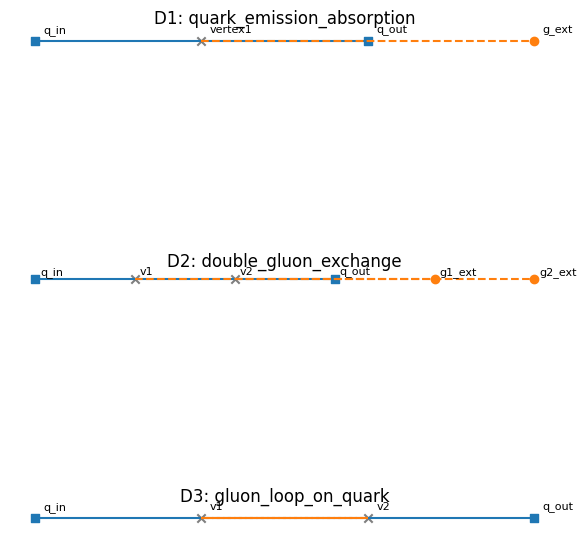

In [4]:
import matplotlib.pyplot as plt



def plot_diagram(diagram: Diagram, ax: plt.Axes | None = None) -> plt.Axes:

    if ax is None:

        fig, ax = plt.subplots(figsize=(4, 3))

    # Plot nodes

    for node in diagram.nodes.values():

        if node.kind == 'quark':

            color = 'tab:blue'

            marker = 's'

        elif node.kind == 'gluon':

            color = 'tab:orange'

            marker = 'o'

        else:

            color = 'tab:gray'

            marker = 'x'

        ax.scatter(node.x, node.y, c=color, marker=marker)

        ax.text(node.x + 0.05, node.y + 0.05, node.name, fontsize=8)

    # Plot edges

    for edge in diagram.edges:

        n1 = diagram.nodes[edge.source]

        n2 = diagram.nodes[edge.target]

        if edge.kind == 'quark':

            color = 'tab:blue'

            ls = '-'

        else:

            color = 'tab:orange'

            ls = '--'

        ax.plot([n1.x, n2.x], [n1.y, n2.y], color=color, linestyle=ls)

    ax.set_aspect('equal', adjustable='box')

    ax.axis('off')

    ax.set_title(f"{diagram.diagram_id}: {diagram.label}")

    return ax



# Visualize all diagrams in a vertical grid

n = len(diagrams)

fig, axes = plt.subplots(n, 1, figsize=(6, 3 * n))

if n == 1:

    axes = [axes]

for ax, d in zip(axes, diagrams.values()):

    plot_diagram(d, ax=ax)

plt.tight_layout()

plt.show()

## 4. Comparing Generated Diagrams to Original Encoded Data



To ensure consistency between the abstract table representation and the generated diagrams,
we compute simple diagnostics:
- the number of nodes and edges per diagram,
- basic counts of quark vs gluon edges, and
- checks that every referenced node in edges exists in the node list.

These checks validate that the reconstruction faithfully follows the numeric and combinatorial data from the table.

In [5]:
def summarize_diagram(diagram: Diagram) -> Dict[str, Any]:

    n_nodes = len(diagram.nodes)

    n_edges = len(diagram.edges)

    n_quark_edges = sum(1 for e in diagram.edges if e.kind == 'quark')

    n_gluon_edges = sum(1 for e in diagram.edges if e.kind == 'gluon')

    # Edge consistency checks

    for e in diagram.edges:

        assert e.source in diagram.nodes, f"Unknown source node {e.source}"

        assert e.target in diagram.nodes, f"Unknown target node {e.target}"

    return {

        'diagram_id': diagram.diagram_id,

        'label': diagram.label,

        'n_nodes': n_nodes,

        'n_edges': n_edges,

        'n_quark_edges': n_quark_edges,

        'n_gluon_edges': n_gluon_edges,

    }



summary_rows = [summarize_diagram(d) for d in diagrams.values()]

df_summary = pd.DataFrame(summary_rows)

df_summary

,diagram_id,label,n_nodes,n_edges,n_quark_edges,n_gluon_edges
0,D1,quark_emission_absorption,4,3,2,1
1,D2,double_gluon_exchange,6,5,3,2
2,D3,gluon_loop_on_quark,4,5,3,2


## 5. Exporting Diagrams for Use Outside the Notebook



Finally, we export each generated diagram as PNG and SVG files with filenames based on `diagram_id`.
Optionally, we also write a small CSV file with per-diagram summary information so the images can be reused programmatically.
The export directory lives inside this repository so that other tools (including VS Code extensions) can load the generated assets.

In [6]:
import pathlib



output_dir = pathlib.Path('generated_table1_diagrams')

output_dir.mkdir(exist_ok=True)



for d in diagrams.values():

    fig, ax = plt.subplots(figsize=(4, 3))

    plot_diagram(d, ax=ax)

    fig.tight_layout()

    png_path = output_dir / f"{d.diagram_id}.png"

    svg_path = output_dir / f"{d.diagram_id}.svg"

    fig.savefig(png_path, dpi=150)

    fig.savefig(svg_path)

    plt.close(fig)



# Export summary metadata

metadata_path = output_dir / 'table1_diagram_summary.csv'

df_summary.to_csv(metadata_path, index=False)

output_dir, metadata_path

(WindowsPath('generated_table1_diagrams'),
 WindowsPath('generated_table1_diagrams/table1_diagram_summary.csv'))